In [10]:
###### import numpy as np
import matplotlib.pyplot as plt
import SKIF_lib as skf
import numpy as np
import os

station = '1_1'

SKIF_path = skf.get_SKIF_directory() #get SKIF project root directory
TablesPath = skf.path_in_project('/' + station + '/TechReports/tabl/')#, your_sys='Mac OC')
FigPath = skf.path_in_project('/' + station + '/TechReports/pic/')
wfrPath = skf.path_in_project('/' + station + '/fields_' + station + '/')
Silicon_T_path = skf.path_in_project('/' + station + '/crystals_data_' + station + '/silicon_T/')
Silicon_R_path = skf.path_in_project('/' + station + '/crystals_data_' + station + '/silicon_R/')

def open_cry(file):

    f = open(file,"r+")
    lines=f.readlines()
    Y=[]

    for x in lines:
        Y.append(x.split('\t')[0])
    f.close()

    Y_ = [0]*(len(Y)-1)
    for i in range(len(Y)-1):
        Y_[i]=float(Y[i])
    return Y_

file_path_x = SKIF_path + Silicon_R_path + "x/"
file_path_y = SKIF_path + Silicon_R_path + "y/"
X_ =[]
Y_ =[]
files = os.listdir(file_path_x)
files.sort()

for filename in files:
    x_ = open_cry(file_path_x + filename)
    X_.append(np.array(x_))
    
files = os.listdir(file_path_y)
files.sort()
for filename in files:
    y_ = open_cry(file_path_y + filename)
    Y_.append(np.array(y_))
          
#saving Dravin curve into a file
harm1 = 15
harm2 = 17
harm3 = 19
harm4 = 21
harm = [harm1, harm2, harm3, harm4]

HARM=[]
fwhm=[]
for (X, Y) in zip(X_, Y_):
    idx = np.where(Y > 0.5)
    fwhm.append(np.max(X[idx]) - np.min(X[idx]))
  
print(fwhm)
for (w, n) in zip(fwhm, harm): 
    HARM.append([int(n), w])

np.savetxt(SKIF_path + TablesPath + "Darvin_curve_silicon.csv", 
           HARM, fmt='%10.d,%10.3f', delimiter=',')#, delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')


Your project name is /home/andrei/Documents/SKIF_XAS_beamline
 edit the skf.get_SKIF_directory if it is needed
[13.8600006, 12.1500017, 10.890001700000001, 9.8999995]


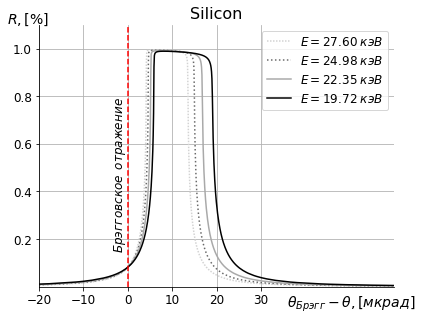

In [11]:
fig = plt.figure(figsize=(1.5*4,1.5*3))

X1 = X_[0]
Y1 = Y_[0]
X2 = X_[1]
Y2 = Y_[1]
X3 = X_[2]
Y3 = Y_[2]
X4  = X_[3]
Y4  = Y_[3]

plt.plot(X4, Y4, color='lightgray', label='$E = 27.60 \; кэВ$', linestyle=(0, (1, 1)))
plt.plot(X3, Y3, color='dimgray', label='$E = 24.98 \; кэВ$', linestyle=':')
plt.plot(X2, Y2, color='darkgray', label='$E = 22.35 \; кэВ$')
plt.plot(X1, Y1, color='black', label='$E = 19.72 \; кэВ$')

plt.grid()

plt.xlabel(r'$\theta_{Брэгг} - \theta, [мкрад]$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$R, [\%]$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.88, -0.03)
ax.yaxis.set_label_coords(-0.03, 0.99)

plt.xticks([-20, -10, 0, 10, 20,30],fontsize=12)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2,0.4,0.6,0.8, 1.0], fontsize=12)
        #  [r'$-1$', r'$0$', r'$+1$'])

plt.xlim(-20, 60)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.title("Silicon", fontsize=16)
plt.axvline(x=0, color='red', linestyle='--')

a=plt.text(-3.5, 0.75, r'$Брэгговское \enspace отражение$', fontsize=12)
a.set_rotation(90)

leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

plt.savefig(SKIF_path + FigPath + 'Silicon_bragg_R.pdf')#, bbox_inches='tight')
plt.savefig(SKIF_path + FigPath + 'Silicon_bragg_R.png', dpi=200)#, bbox_inches='tight')
plt.show()